# Importing Necesaries Libraries

In [4]:
pip install distancerasters

  Using cached distancerasters-0.3.1-py3-none-any.whl (9.0 kB)
  Using cached rasterstats-0.16.0-py3-none-any.whl (16 kB)
  Using cached simplejson-3.17.6-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (136 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import requests
import json
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import fiona
import distancerasters as dr
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

# Creating Training Set

In [6]:
lc = gpd.read_file('Data/LC.shp')
lc.head(5)

,Code,Name,geometry
0,1,slum,"POLYGON ((-0.28028 5.51937, -0.27967 5.51938, ..."
1,1,slum,"POLYGON ((-0.27980 5.52036, -0.27931 5.52042, ..."
2,2,light veg,"POLYGON ((-0.28300 5.51936, -0.28275 5.51952, ..."
3,2,light veg,"POLYGON ((-0.28297 5.51920, -0.28277 5.51923, ..."
4,3,soil,"POLYGON ((-0.28316 5.51874, -0.28303 5.51874, ..."


In [7]:
lc.groupby(['Name'],as_index=False).agg('count')

,Name,Code,geometry
0,light veg,25,25
1,pav road,1,1
2,road,7,7
3,road pav,2,2
4,road paved,5,5
5,slum,21,21
6,soil,8,8
7,stag water,3,3
8,urban,26,26
9,water,4,4


In [8]:
lc['Name'] =  lc['Name'].replace({"pav road":"road"})
lc['Name'] = lc['Name'].replace({"pav road":"road"})
lc['Name'] = lc['Name'].replace({"road pav":"road"})
lc['Name'] = lc['Name'].replace({"road paved":"road"})
lc['Name'] = lc['Name'].replace({"stag water":"water"})
lc['Name'] = lc['Name'].replace({"light veg":"veg"})

<AxesSubplot:>

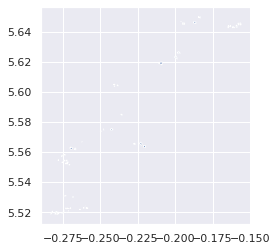

In [10]:
lc.plot() ## look at the white spots

In [12]:
print(glob("./out/*"))

['./out/acc_b4.tif', './out/stack_amcra_final.tif', './out/acc_img_bgrn.tif', './out/industry.tif', './out/highway.tif', './out/market.tif', './out/acc_b3.tif', './out/acc_b2.tif', './out/acc_b1.tif']


In [ ]:
# Run this if you want to separate the bans in separate bans
#with gw.open('./out/acc_img_bgrn.tif' ) as src:
#     src.sel(band=[1]).gw.to_raster('./out/acc_b1.tif')    
# with gw.open('./out/acc_img_bgrn.tif' ) as src:
#     src.sel(band=[2]).gw.to_raster('./out/acc_b2.tif')
# with gw.open('./out/acc_img_bgrn.tif' ) as src:
#     src.sel(band=[3]).gw.to_raster('./out/acc_b3.tif')
# with gw.open('./out/acc_img_bgrn.tif' ) as src:
#     src.sel(band=[4]).gw.to_raster('./out/acc_b4.tif')

In [13]:
d1 = ['./out/acc_b1.tif',
'./out/acc_b2.tif',
'./out/acc_b3.tif', 
'./out/acc_b4.tif',
'./out/industry.tif',
'./out/highway.tif', 
'./out/market.tif']

In [21]:
out_name = 'stack_amcra_final.tif'

In [22]:
import geowombat as gw
import os
# Test loop through band names and output names
with gw.config.update(ref_image='./out/acc_img_bgrn.tif'):
    with gw.open(file,stack_dim= 'band') as src:
        src.gw.to_raster(os.path.join('./out',out_name), overwrite = True)

100%|██████████| 16/16 [00:02<00:00,  6.66it/s]


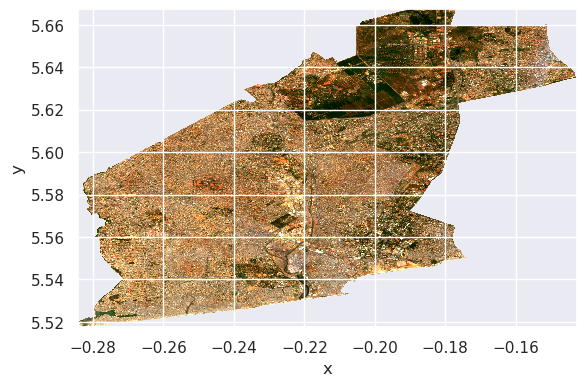

In [23]:
### BEGIN SOLUTION
import matplotlib.pyplot as plt
fig, ax = plt.subplots(dpi=100)
with gw.open(os.path.join('./out/stack_amcra_final.tif')) as src:
    src.sel(band=[3,2,1]).plot.imshow(robust = True,ax=ax)
plt.tight_layout(pad = 1)


In [27]:
df_poly.head()
df_poly.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [28]:
raster = './out/stack_amcra_final.tif'
with gw.config.update(sensor='bgrn'):
    with gw.open(raster) as src: 
        df = src.gw.extract(df_poly,  
                       band_names=src.band.values.tolist(),all_touched = True)
    print(df.iloc[:,:])

03:40:12:WARNING:298:xarray_.warp_open:  The new bands, ['blue', 'green', 'red', 'nir'], do not match the sensor bands, [1, 2, 3, 4, 5, 6, 7].


       id  point                  geometry  Code  Name   1   2   3   4  \
0       0      0  POINT (-0.28432 5.66738)     1  slum NaN NaN NaN NaN   
1       0      1  POINT (-0.28423 5.66738)     1  slum NaN NaN NaN NaN   
2       0      2  POINT (-0.28414 5.66738)     1  slum NaN NaN NaN NaN   
3       0      3  POINT (-0.28405 5.66738)     1  slum NaN NaN NaN NaN   
4       0      4  POINT (-0.28396 5.66738)     1  slum NaN NaN NaN NaN   
...   ...    ...                       ...   ...   ...  ..  ..  ..  ..   
3112  101   3112  POINT (-0.28396 5.66684)     1  slum NaN NaN NaN NaN   
3113  101   3113  POINT (-0.28387 5.66684)     1  slum NaN NaN NaN NaN   
3114  101   3114  POINT (-0.28405 5.66675)     1  slum NaN NaN NaN NaN   
3115  101   3115  POINT (-0.28396 5.66675)     1  slum NaN NaN NaN NaN   
3116  101   3116  POINT (-0.28387 5.66675)     1  slum NaN NaN NaN NaN   

                5            6            7  
0     6829.375255  6717.647890  7268.213810  
1     6821.347862  

In [30]:
df.isnull().sum(axis = 0)

id             0
point          0
geometry       0
Code           0
Name           0
1           3117
2           3117
3           3117
4           3117
5              0
6              0
7              0
dtype: int64

In [31]:
df.shape

(3117, 12)

In [33]:
### BEGIN SOLUTION
from sklearn_xarray.preprocessing import Featurizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from geowombat.ml import fit, fit_predict
from sklearn.decomposition import PCA 
import geowombat as gw 
import geopandas as gpd
from sklearn.impute import SimpleImputer
# Use a data pipeline
pipe = Pipeline([
            ('SimpleImputer', SimpleImputer(missing_values=np.nan, strategy="mean")),
            ('Featurizer', Featurizer()),
            ('scaler', StandardScaler()),
            ('rf', RandomForestClassifier(min_samples_split=3))])

### END SOLUTION


In [34]:
### BEGIN SOLUTION
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
# create numeric values for flower names
# open rf instance with hyperparameters set
# visualize_classifier(pipe,df_poly.drop('LC',axis=1).values,y);
with gw.open(d1,stack_dim= 'band') as src:
    y = fit_predict(src, df_poly, pipe, col='Code')
    y.sel(band='targ').gw.imshow()
### END SOLUTION

ValueError: conflicting sizes for dimension 'y': length 1669 on 'targ' and length 3327 on {'y': 'y', 'x': 'x', 'band': 'band', 'time': 'time'}